In [ ]:
Analysis of a particular stock's correlation with Tweets
----------

Sentiment in the social media (facebook, twitter, instagram, linkedin etc.) plays a big role in managing the perception of an organisation. This sentiment can have an impact in the stock price of listed companies. Is there a statistically significant correlation (or even a lagged correlation) between the social media sentiment and the stock price. This will give the corporate communications department a very important tool to monitor the leading indicator (social media sentiment) in order to estimate the lagging indicator (stock price)

In [4]:
# Imports
import re
import tweepy
from tweepy import OAuthHandler
from textblob import TextBlob
from alpha_vantage.timeseries import TimeSeries
import matplotlib.pyplot as plt
import sys
import pandas as pd
from dateutil import parser
from datetime import datetime, timedelta

In [5]:
# Twitter Client Class    
class TwitterClient(object):
    
    def __init__(self):
        # keys and tokens from the Twitter Dev Console
        consumer_key = 'Ve8tKh7aP2CtGhFUtV26W7Zr8'
        consumer_secret = 'P7L9hsifW5cRT4Yg9eJHzDtmi1RZ42ENSWwcKLp7SkegoG4TYT'
        access_token = '2918675084-KoiDatN9UJnvOKJxv4E2eFXmbh94GTiydawSf9w'
        access_token_secret = 'xpcA5NEFyGZ6WQZ5leXpBqHJDS8DlBBseQGqJpJQJU6Y9'
 
        # attempt authentication
        try:
            # create OAuthHandler object
            self.auth = OAuthHandler(consumer_key, consumer_secret)
            # set access token and secret
            self.auth.set_access_token(access_token, access_token_secret)
            # create tweepy API object to fetch tweets
            self.api = tweepy.API(self.auth)
        except:
            print("Error: Authentication Failed")
 
    def clean_tweet(self, tweet):
        return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())
 
    def get_tweet_sentiment(self, tweet):
        # create TextBlob object of passed tweet text
        analysis = TextBlob(self.clean_tweet(tweet))
        # set sentiment
        if analysis.sentiment.polarity > 0:
            return 'positive'
        elif analysis.sentiment.polarity == 0:
            return 'neutral'
        else:
            return 'negative'
 
    def get_tweets(self, query, count = 10):
        '''
        Main function to fetch tweets and parse them.
        '''
        # empty list to store parsed tweets
        tweets = []
 
        try:
            # call twitter api to fetch tweets
            fetched_tweets = self.api.search(q = query, since="2017-11-07",
                           until="2017-11-10", count = count)
 
            # parsing tweets one by one
            for tweet in fetched_tweets:
                # empty dictionary to store required params of a tweet
                parsed_tweet = {}
 
                # saving text of tweet
                parsed_tweet['tweet'] = tweet.text
                # saving sentiment of tweet
                parsed_tweet['sentiment'] = self.get_tweet_sentiment(tweet.text)
                # saving time of tweet
                parsed_tweet['created_at'] = tweet.created_at
 
                # appending parsed tweet to tweets list
                if tweet.retweet_count > 0:
                    # if tweet has retweets, ensure that it is appended only once
                    if parsed_tweet not in tweets:
                        tweets.append(parsed_tweet)
                else:
                    tweets.append(parsed_tweet)
 
            # return parsed tweets
            return tweets
 
        except tweepy.TweepError as e:
            # print error (if any)
            print("Error : " + str(e))

In [6]:
# creating object of TwitterClient Class
api = TwitterClient()
# calling function to get tweets
query = input('Enter the stock name listed in BSE or NSE : ')
epoch = int(input('Enter the number of tweets to be taken : '))
tweets = api.get_tweets(query = query, count = epoch)

# picking positive tweets from tweets
ptweets = [tweet for tweet in tweets if tweet['sentiment'] == 'positive']
# percentage of positive tweets
print("Positive tweets percentage: {} %".format(100*len(ptweets)/len(tweets)))

# picking neutral tweets from tweets
netweets = [tweet for tweet in tweets if tweet['sentiment'] == 'neutral']
# percentage of neutral tweets
print("Neutral tweets percentage: {} %".format(100*len(netweets)/len(tweets))) 

# picking negative tweets from tweets
ntweets = [tweet for tweet in tweets if tweet['sentiment'] == 'negative']
# percentage of negative tweets
print("Negative tweets percentage: {} %".format(100*len(ntweets)/len(tweets)))

# printing first 5 positive tweets
print("\n\nPositive tweets :")
for tweet in ptweets[:10]:
    print(tweet['tweet'])
    
# printing first 5 neutral tweets
print("\n\nNeutral tweets :")
for tweet in netweets[:10]:
    print(tweet['tweet'])
    
# printing first 5 negative tweets
print("\n\nNegative tweets :")
for tweet in ntweets[:10]:
    print(tweet['tweet'])

tweets_df = pd.DataFrame(tweets)
ptweets_df = pd.DataFrame(ptweets)
ntweets_df = pd.DataFrame(ntweets)
netweets_df = pd.DataFrame(netweets)

Enter the stock name listed in BSE or NSE : Eicher Motors
Enter the number of tweets to be taken : 500
Positive tweets percentage: 20.0 %
Neutral tweets percentage: 63.333333333333336 %
Negative tweets percentage: 16.666666666666668 %


Positive tweets :
Top Stories On BTVI: Eicher Motors Plans To Invest Rs 800 Cr In a Year
Eicher Motors gains with its two-wheeler division unveiling two new 650cc bikes
#BusinessNews Eicher Motors’ two-wheeler division unveils two new 650cc bike https://t.co/nLQg7J1iyE
@sidlal, MD, Eicher Motors says The new twins - Interceptor 650 &amp; Continental GT 650 will herald @royalenfield's presence around the world
@AskBNSN Is this right time  to buy Eicher Motors/Force Motors or shall I wait for correction ?
#BusinessNews Eicher Motors’ two-wheeler division to display new 650cc bike at Milan show https://t.co/yZgoxGbP3d


Neutral tweets :
#Breaking_News (Buy Pidilite Industries; sell Eicher Motors, UltraTech Cement: Ashwani Gujral) -… https://t.co/yEV3ipAn2U

In [7]:
# Plotting the index 
def stockchart(symbol):
    key = 'PD3O8KG4280HX51V'
    ts = TimeSeries(key=key, output_format='pandas')
    data, meta_data = ts.get_intraday(symbol=symbol,interval='15min', outputsize='full')
    return data

In [8]:
symbol = "EICHERMOT"
stock_data = stockchart(symbol)

In [9]:
ptweets_df.head()

,created_at,sentiment,tweet
0,2017-11-08 10:54:04,positive,Top Stories On BTVI: Eicher Motors Plans To In...
1,2017-11-08 08:49:58,positive,Eicher Motors gains with its two-wheeler divis...
2,2017-11-08 04:09:16,positive,#BusinessNews Eicher Motors’ two-wheeler divis...
3,2017-11-07 15:33:47,positive,"@sidlal, MD, Eicher Motors says The new twins ..."
4,2017-11-07 06:24:09,positive,@AskBNSN Is this right time to buy Eicher Mot...


In [10]:
print(len(tweets_df))
print(len(ptweets_df))
print(len(ntweets_df))
print(len(netweets_df))

30
6
5
19


In [11]:
tweets_df.head()

,created_at,sentiment,tweet
0,2017-11-09 10:30:21,neutral,#Breaking_News (Buy Pidilite Industries; sell ...
1,2017-11-09 08:22:29,neutral,@Deishma Sir what do you see in eicher motors....
2,2017-11-09 06:57:49,neutral,"#CoalIndia, IndusInd Bank, Eicher Motors and I..."
3,2017-11-08 10:54:04,positive,Top Stories On BTVI: Eicher Motors Plans To In...
4,2017-11-08 08:49:58,positive,Eicher Motors gains with its two-wheeler divis...


In [12]:
ntweets_df.head()

,created_at,sentiment,tweet
0,2017-11-07 06:07:35,negative,RT @MotilalOswalLtd: Haven't sold a single sha...
1,2017-11-07 06:01:02,negative,RT @MotilalOswalLtd: Haven't sold a single sha...
2,2017-11-07 05:56:13,negative,RT @MotilalOswalLtd: Haven't sold a single sha...
3,2017-11-07 05:49:53,negative,RT @MotilalOswalLtd: Haven't sold a single sha...
4,2017-11-07 05:49:17,negative,Haven't sold a single share of Eicher Motors t...


In [13]:
netweets_df.head()

,created_at,sentiment,tweet
0,2017-11-09 10:30:21,neutral,#Breaking_News (Buy Pidilite Industries; sell ...
1,2017-11-09 08:22:29,neutral,@Deishma Sir what do you see in eicher motors....
2,2017-11-09 06:57:49,neutral,"#CoalIndia, IndusInd Bank, Eicher Motors and I..."
3,2017-11-08 03:45:42,neutral,Global Commercial Vehicles Market 2017- SINOT...
4,2017-11-08 02:57:04,neutral,Stocks To Watch: Eicher Motors: Unveils Twin M...


In [14]:
stock_data.head()

,open,high,low,close,volume
Date,,,,,
2017-10-30 00:00:00,31900.00,32190.00,31900.00,32168.45,2674.0
2017-10-30 00:15:00,32170.05,32269.95,32094.00,32200.10,1212.0
2017-10-30 00:30:00,32200.10,32311.75,32200.00,32311.75,916.0
2017-10-30 00:45:00,32325.00,32349.00,32206.65,32257.80,1560.0
2017-10-30 01:00:00,32256.10,32290.00,32190.00,32256.10,715.0


In [15]:
# Time Conversion
def ceil_dt(dt):
    delta = timedelta(minutes=15)
    return (dt + (datetime.min - dt) % delta) + timedelta(hours=2)

In [16]:
stock_date = []
for index, row in stock_data.iterrows():
    stock_date.append(parser.parse(index))
se = pd.Series(stock_date)
stock_data['Time'] = se.values

tweets_df_date = []
for index, row in tweets_df.iterrows():
    tweets_df_date.append(row[0])
se = pd.Series(tweets_df_date)
tweets_df['Act_Time'] = se.values
tweets_df['Time'] = se.values

ptweets_df_date = []
for index, row in ptweets_df.iterrows():
    ptweets_df_date.append(row[0])
se = pd.Series(ptweets_df_date)
ptweets_df['Time'] = se.values

ntweets_df_date = []
for index, row in ntweets_df.iterrows():
    ntweets_df_date.append(row[0])
se = pd.Series(ntweets_df_date)
ntweets_df['Time'] = se.values

netweets_df_date = []
for index, row in netweets_df.iterrows():
    netweets_df_date.append(row[0])
se = pd.Series(netweets_df_date)
netweets_df['Time'] = se.values

In [17]:
stock_date = []
for index, row in stock_data.iterrows():
    stock_date.append(parser.parse(index).date())
se = pd.Series(stock_date)
stock_data['Date'] = se.values

In [18]:
new_time = []
for index, row in tweets_df.iterrows():
    new_time.append(ceil_dt(parser.parse(str(row[3]))))
se = pd.Series(new_time)
tweets_df['Time'] = se.values

In [19]:
tweets_df.head()

,created_at,sentiment,tweet,Act_Time,Time
0,2017-11-09 10:30:21,neutral,#Breaking_News (Buy Pidilite Industries; sell ...,2017-11-09 10:30:21,2017-11-09 12:45:00
1,2017-11-09 08:22:29,neutral,@Deishma Sir what do you see in eicher motors....,2017-11-09 08:22:29,2017-11-09 10:30:00
2,2017-11-09 06:57:49,neutral,"#CoalIndia, IndusInd Bank, Eicher Motors and I...",2017-11-09 06:57:49,2017-11-09 09:00:00
3,2017-11-08 10:54:04,positive,Top Stories On BTVI: Eicher Motors Plans To In...,2017-11-08 10:54:04,2017-11-08 13:00:00
4,2017-11-08 08:49:58,positive,Eicher Motors gains with its two-wheeler divis...,2017-11-08 08:49:58,2017-11-08 11:00:00


In [20]:
stock_data

,open,high,low,close,volume,Time,Date
Date,,,,,,,
2017-10-30 00:00:00,31900.00,32190.00,31900.00,32168.45,2674.0,2017-10-30 00:00:00,2017-10-30
2017-10-30 00:15:00,32170.05,32269.95,32094.00,32200.10,1212.0,2017-10-30 00:15:00,2017-10-30
2017-10-30 00:30:00,32200.10,32311.75,32200.00,32311.75,916.0,2017-10-30 00:30:00,2017-10-30
2017-10-30 00:45:00,32325.00,32349.00,32206.65,32257.80,1560.0,2017-10-30 00:45:00,2017-10-30
2017-10-30 01:00:00,32256.10,32290.00,32190.00,32256.10,715.0,2017-10-30 01:00:00,2017-10-30
2017-10-30 01:15:00,32257.60,32279.95,32206.40,32273.20,256.0,2017-10-30 01:15:00,2017-10-30
2017-10-30 01:30:00,32257.95,32300.00,32214.90,32271.15,582.0,2017-10-30 01:30:00,2017-10-30
2017-10-30 01:45:00,32295.20,32296.00,32267.75,32267.75,186.0,2017-10-30 01:45:00,2017-10-30
2017-10-30 02:00:00,32268.00,32290.00,32262.50,32276.60,264.0,2017-10-30 02:00:00,2017-10-30


In [21]:
new_df = pd.merge(tweets_df, stock_data, on='Time')

In [22]:
new_df

,created_at,sentiment,tweet,Act_Time,Time,open,high,low,close,volume,Date
0,2017-11-08 02:57:04,neutral,Stocks To Watch: Eicher Motors: Unveils Twin M...,2017-11-08 02:57:04,2017-11-08 05:00:00,31204.95,31242.80,31056.00,31109.5,2076.0,2017-11-08
1,2017-11-07 02:00:09,neutral,Royal Enfield's big bike could test Harley's I...,2017-11-07 02:00:09,2017-11-07 04:15:00,31150.00,31181.20,31103.15,31148.0,1341.0,2017-11-07
2,2017-11-07 01:43:19,neutral,RT @mindblowingtour: https://t.co/PI2GfLWjM2,2017-11-07 01:43:19,2017-11-07 03:45:00,31161.20,31161.20,31100.65,31149.0,1030.0,2017-11-07
3,2017-11-07 01:42:08,neutral,https://t.co/PI2GfLWjM2,2017-11-07 01:42:08,2017-11-07 03:45:00,31161.20,31161.20,31100.65,31149.0,1030.0,2017-11-07
4,2017-11-07 00:58:40,neutral,RT @ReutersIndia: Royal Enfield's big bike cou...,2017-11-07 00:58:40,2017-11-07 03:00:00,31107.20,31150.05,31100.00,31120.0,828.0,2017-11-07
5,2017-11-07 00:58:05,neutral,Royal Enfield's big bike could test Harley's I...,2017-11-07 00:58:05,2017-11-07 03:00:00,31107.20,31150.05,31100.00,31120.0,828.0,2017-11-07
6,2017-11-07 00:05:26,neutral,@harleydavidson @royalenfield @EicherMotorsLtd...,2017-11-07 00:05:26,2017-11-07 02:15:00,31139.00,31139.50,31115.00,31121.7,1145.0,2017-11-07


In [23]:
new_df

,created_at,sentiment,tweet,Act_Time,Time,open,high,low,close,volume,Date
0,2017-11-08 02:57:04,neutral,Stocks To Watch: Eicher Motors: Unveils Twin M...,2017-11-08 02:57:04,2017-11-08 05:00:00,31204.95,31242.80,31056.00,31109.5,2076.0,2017-11-08
1,2017-11-07 02:00:09,neutral,Royal Enfield's big bike could test Harley's I...,2017-11-07 02:00:09,2017-11-07 04:15:00,31150.00,31181.20,31103.15,31148.0,1341.0,2017-11-07
2,2017-11-07 01:43:19,neutral,RT @mindblowingtour: https://t.co/PI2GfLWjM2,2017-11-07 01:43:19,2017-11-07 03:45:00,31161.20,31161.20,31100.65,31149.0,1030.0,2017-11-07
3,2017-11-07 01:42:08,neutral,https://t.co/PI2GfLWjM2,2017-11-07 01:42:08,2017-11-07 03:45:00,31161.20,31161.20,31100.65,31149.0,1030.0,2017-11-07
4,2017-11-07 00:58:40,neutral,RT @ReutersIndia: Royal Enfield's big bike cou...,2017-11-07 00:58:40,2017-11-07 03:00:00,31107.20,31150.05,31100.00,31120.0,828.0,2017-11-07
5,2017-11-07 00:58:05,neutral,Royal Enfield's big bike could test Harley's I...,2017-11-07 00:58:05,2017-11-07 03:00:00,31107.20,31150.05,31100.00,31120.0,828.0,2017-11-07
6,2017-11-07 00:05:26,neutral,@harleydavidson @royalenfield @EicherMotorsLtd...,2017-11-07 00:05:26,2017-11-07 02:15:00,31139.00,31139.50,31115.00,31121.7,1145.0,2017-11-07


In [24]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()

training_data = new_df

for col in training_data.columns.values:
    data = training_data[col]
    lb.fit(data.values)
    training_data[col] = lb.transform(training_data[col])

Findings
----------
- Stock prices are highly correlated with the time when the tweets were posted.
- Close prices are correlated with the Date and Time when the tweets were posted.

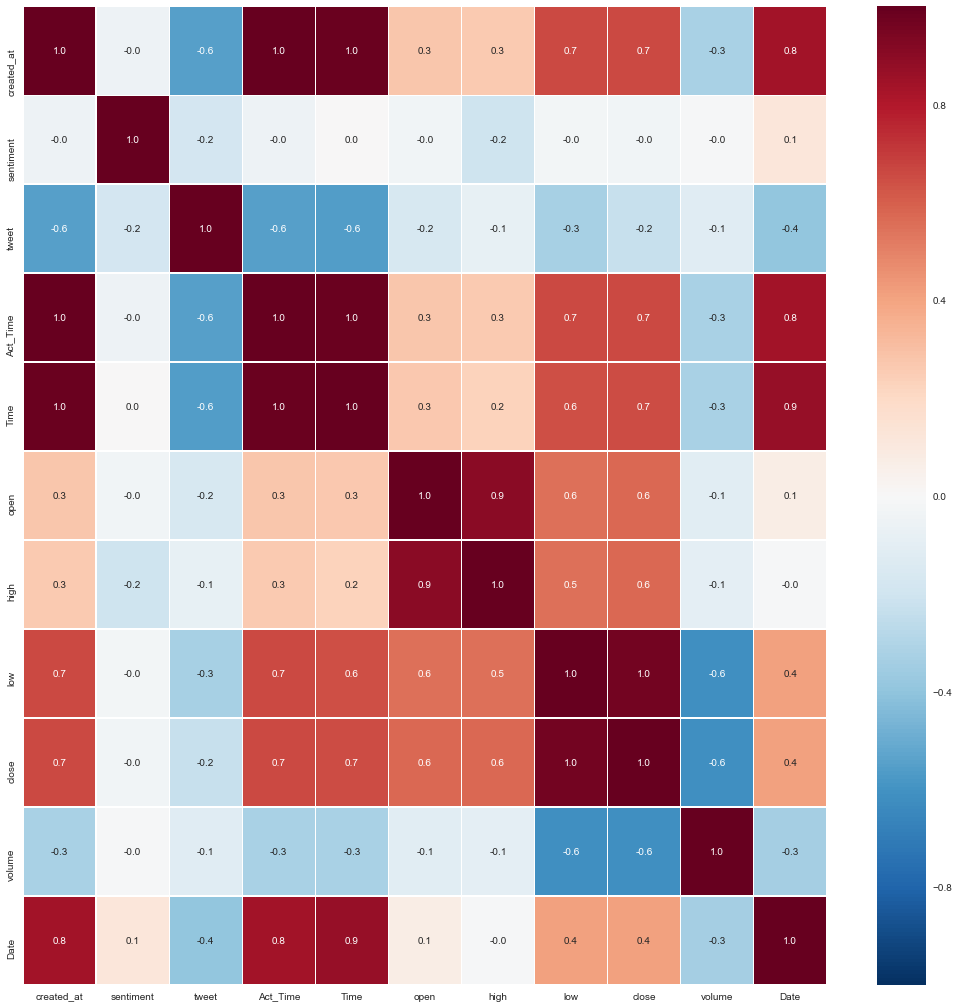

In [35]:
import seaborn as sns
%matplotlib inline
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(new_df.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

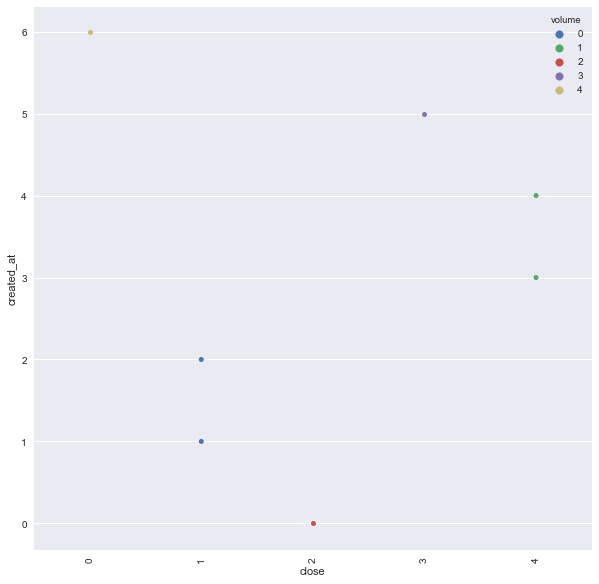

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.figure(figsize=(10,10))
sns.swarmplot(x="close", y="created_at", hue="volume", data=new_df)
plt.xticks(rotation=90)